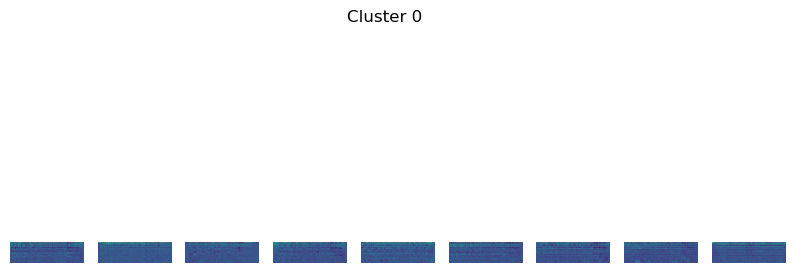

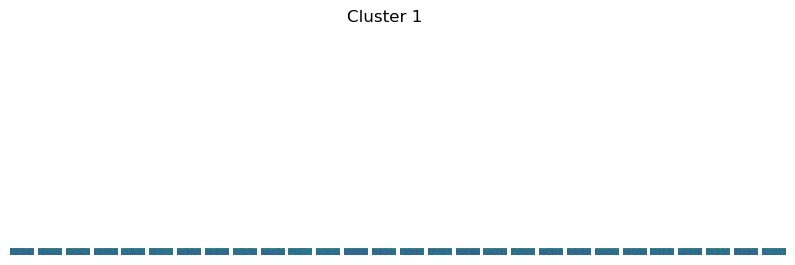

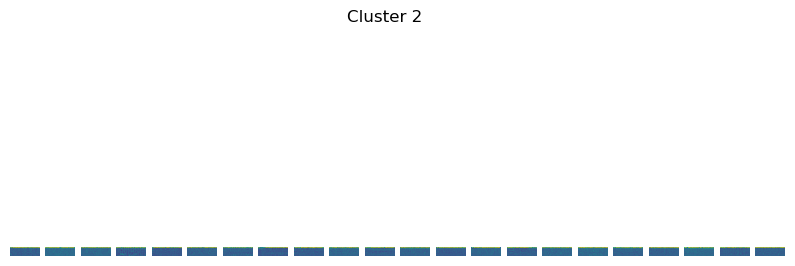

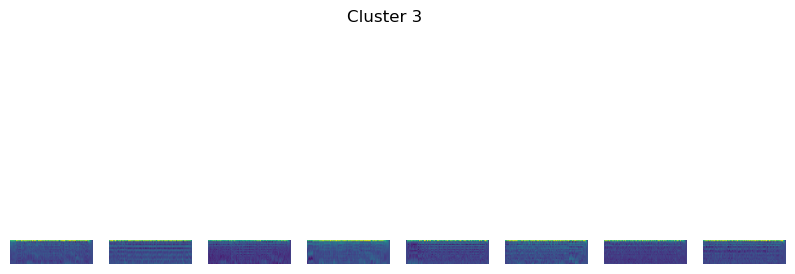

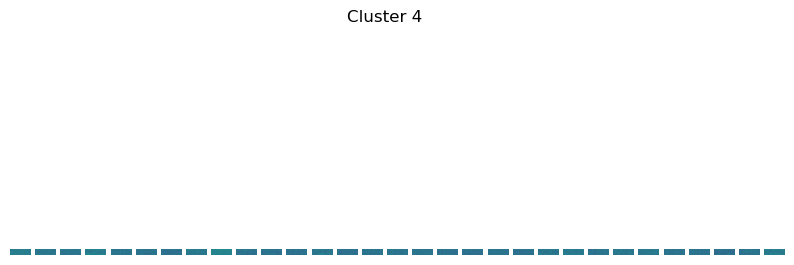

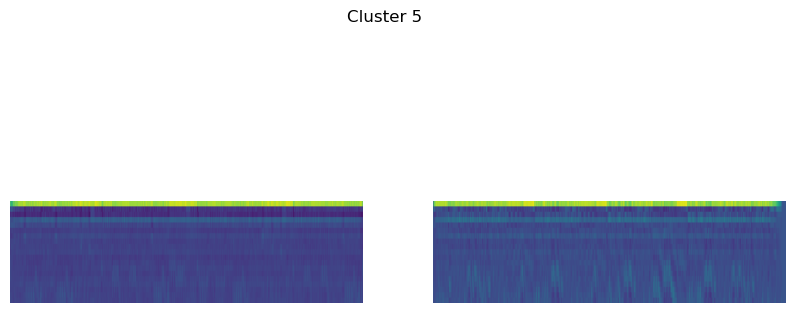

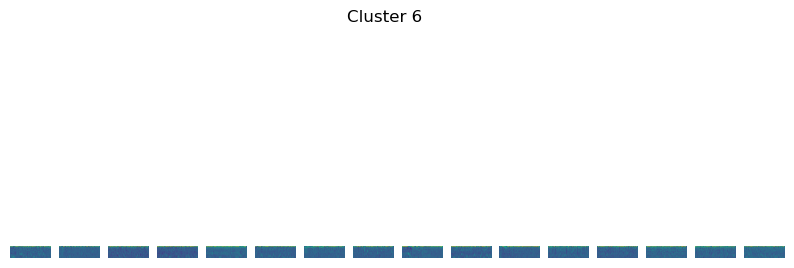

In [19]:
import cv2
import numpy as np
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load images and extract features
def load_images_from_folder(folder):
    images = []
    filenames = []
    for filename in sorted(os.listdir(folder)):  # Sort to maintain order
        if filename.endswith(".png"):
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                img = cv2.resize(img, (64, 64))  # Resize for consistency
                images.append(img)
                filenames.append(filename)
    return images, filenames

def extract_features(images):
    # Flatten the images to use as features
    features = [img.flatten() for img in images]
    return np.array(features)

def cluster_images(folder, num_clusters):
    images, filenames = load_images_from_folder(folder)
    features = extract_features(images)
    
    kmeans = KMeans(n_clusters=num_clusters)
    labels = kmeans.fit_predict(features)
    
    return labels, filenames

# Visualize clustered images
def visualize_clusters(folder, labels, filenames):
    unique_labels = np.unique(labels)
    for label in unique_labels:
        plt.figure(figsize=(10, 5))
        cluster_images = [filenames[i] for i in range(len(filenames)) if labels[i] == label]
        for i, img_file in enumerate(cluster_images):
            img = cv2.imread(os.path.join(folder, img_file))
            plt.subplot(1, len(cluster_images), i + 1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.axis('off')
        plt.suptitle(f'Cluster {label}')
        plt.show()

# Usage
folder_path = 'photos'  # Path to your photos directory
num_clusters = 7  # Change the number of clusters as needed
labels, filenames = cluster_images(folder_path, num_clusters)
visualize_clusters(folder_path, labels, filenames)
